In [1]:
import pandas as pd 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 

In [2]:
from sklearn.datasets import load_breast_cancer
data =  load_breast_cancer()

In [4]:
print(data.data, data.target)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2)

In [7]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)


In [9]:
from sklearn.metrics import classification_report, confusion_matrix
def metricss(y_test,  y_pred):
    print(confusion_matrix(y_test,  y_pred))
    print(classification_report(y_test, y_pred))
    
metricss(y_test,  y_pred)

[[35  1]
 [ 4 74]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93        36
           1       0.99      0.95      0.97        78

    accuracy                           0.96       114
   macro avg       0.94      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



## let's do Hyper-parameter tuning 

In [30]:
parameters = {
    "learning_rate": [0.1,0.01, 0.02, 0.2, 0.5],
    "n_estimators" : [1, 2, 4, 8, 16, 32, 64, 100, 200],
    "max_depth" : np.linspace(1, 32, 32, endpoint=True),
    "min_samples_split" :  np.linspace(0.1, 1.0, 10, endpoint=True),
    "min_samples_leaf" : np.linspace(0.1, 0.5, 5, endpoint=True),
    "max_features": list(range(1,X_train.shape[1])),
        "random_state": list(range(1,X_train.shape[1]))

    
}

In [31]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [32]:
gs = RandomizedSearchCV(GradientBoostingClassifier(), param_distributions=parameters, cv=5, verbose=5)

In [33]:
gs.fit(X_train, y_train)
y_pred = gs.predict(X_test)
metricss(y_test, y_pred)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] random_state=6, n_estimators=8, min_samples_split=1.0, min_samples_leaf=0.4, max_features=5, max_depth=21.0, learning_rate=0.02 
[CV]  random_state=6, n_estimators=8, min_samples_split=1.0, min_samples_leaf=0.4, max_features=5, max_depth=21.0, learning_rate=0.02, score=0.615, total=   0.0s
[CV] random_state=6, n_estimators=8, min_samples_split=1.0, min_samples_leaf=0.4, max_features=5, max_depth=21.0, learning_rate=0.02 
[CV]  random_state=6, n_estimators=8, min_samples_split=1.0, min_samples_leaf=0.4, max_features=5, max_depth=21.0, learning_rate=0.02, score=0.615, total=   0.0s
[CV] random_state=6, n_estimators=8, min_samples_split=1.0, min_samples_leaf=0.4, max_features=5, max_depth=21.0, learning_rate=0.02 
[CV]  random_state=6, n_estimators=8, min_samples_split=1.0, min_samples_leaf=0.4, max_features=5, max_depth=21.0, learning_rate=0.02, score=0.615, total=   0.0s
[CV] random_state=6, n_estimators=8, min_samples_sp

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


[CV]  random_state=4, n_estimators=100, min_samples_split=0.2, min_samples_leaf=0.5, max_features=13, max_depth=28.0, learning_rate=0.2, score=0.934, total=   0.1s
[CV] random_state=4, n_estimators=100, min_samples_split=0.2, min_samples_leaf=0.5, max_features=13, max_depth=28.0, learning_rate=0.2 
[CV]  random_state=4, n_estimators=100, min_samples_split=0.2, min_samples_leaf=0.5, max_features=13, max_depth=28.0, learning_rate=0.2, score=0.912, total=   0.1s
[CV] random_state=4, n_estimators=100, min_samples_split=0.2, min_samples_leaf=0.5, max_features=13, max_depth=28.0, learning_rate=0.2 
[CV]  random_state=4, n_estimators=100, min_samples_split=0.2, min_samples_leaf=0.5, max_features=13, max_depth=28.0, learning_rate=0.2, score=0.890, total=   0.1s
[CV] random_state=4, n_estimators=100, min_samples_split=0.2, min_samples_leaf=0.5, max_features=13, max_depth=28.0, learning_rate=0.2 
[CV]  random_state=4, n_estimators=100, min_samples_split=0.2, min_samples_leaf=0.5, max_features=13

[CV]  random_state=27, n_estimators=100, min_samples_split=1.0, min_samples_leaf=0.30000000000000004, max_features=14, max_depth=6.0, learning_rate=0.5, score=0.978, total=   0.1s
[CV] random_state=23, n_estimators=16, min_samples_split=0.7000000000000001, min_samples_leaf=0.30000000000000004, max_features=16, max_depth=6.0, learning_rate=0.5 
[CV]  random_state=23, n_estimators=16, min_samples_split=0.7000000000000001, min_samples_leaf=0.30000000000000004, max_features=16, max_depth=6.0, learning_rate=0.5, score=0.967, total=   0.0s
[CV] random_state=23, n_estimators=16, min_samples_split=0.7000000000000001, min_samples_leaf=0.30000000000000004, max_features=16, max_depth=6.0, learning_rate=0.5 
[CV]  random_state=23, n_estimators=16, min_samples_split=0.7000000000000001, min_samples_leaf=0.30000000000000004, max_features=16, max_depth=6.0, learning_rate=0.5, score=0.967, total=   0.0s
[CV] random_state=23, n_estimators=16, min_samples_split=0.7000000000000001, min_samples_leaf=0.3000

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    2.8s finished


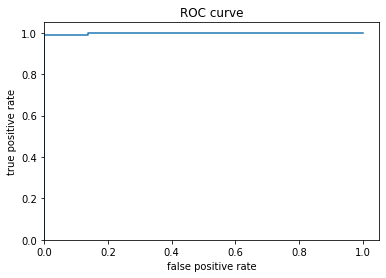

In [41]:
# let's explore gradient boosting  more 
y_pred_prob = gs.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob[:,1])
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.xlim(0,)
plt.ylim(0,);

/usr/local/lib/python3.7/site-packages/sklearn/inspection/_plot/partial_dependence.py:582: UserWarning: Attempting to set identical bottom == top == 0.613173676053271 results in singular transformations; automatically expanding.
  axi.set_ylim(self.pdp_lim[1])


<Figure size 2160x2160 with 0 Axes>

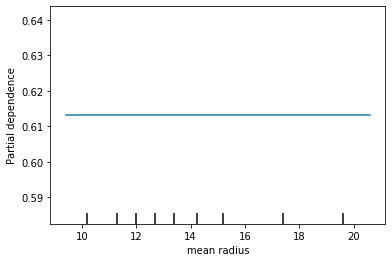

<Figure size 2160x2160 with 0 Axes>

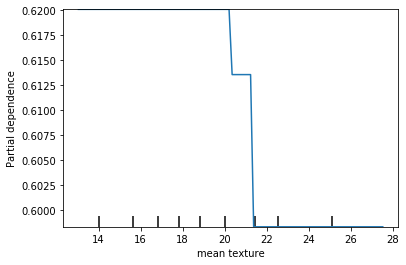

<Figure size 2160x2160 with 0 Axes>

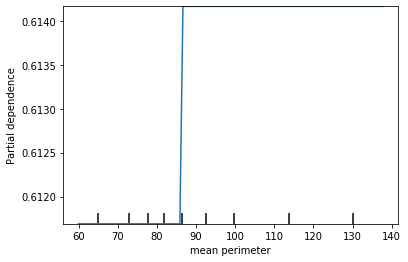

<Figure size 2160x2160 with 0 Axes>

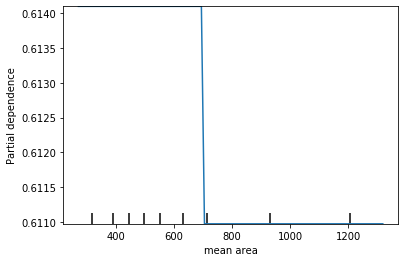

<Figure size 2160x2160 with 0 Axes>

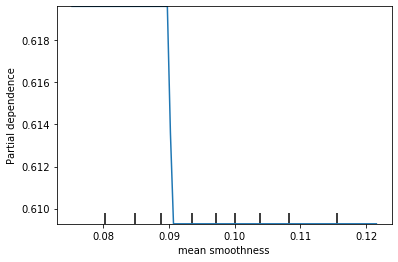

<Figure size 2160x2160 with 0 Axes>

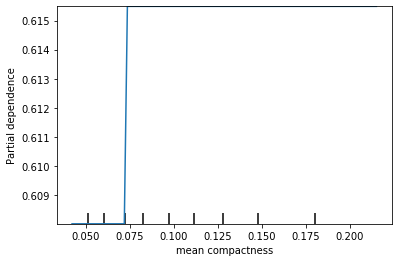

<Figure size 2160x2160 with 0 Axes>

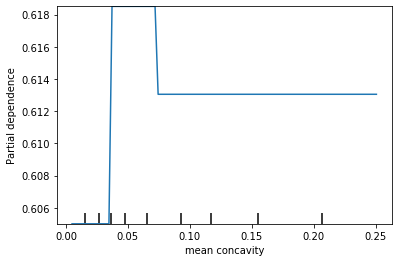

<Figure size 2160x2160 with 0 Axes>

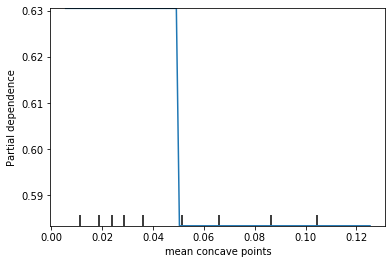

<Figure size 2160x2160 with 0 Axes>

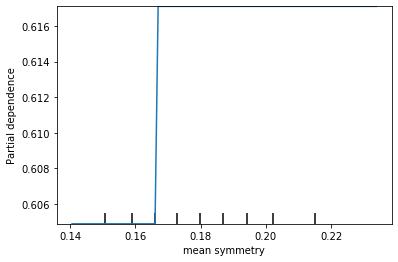

<Figure size 2160x2160 with 0 Axes>

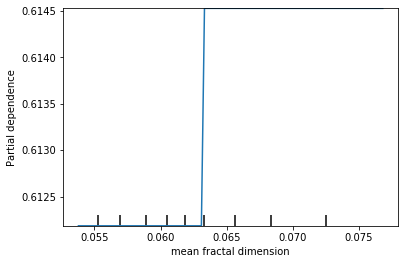

<Figure size 2160x2160 with 0 Axes>

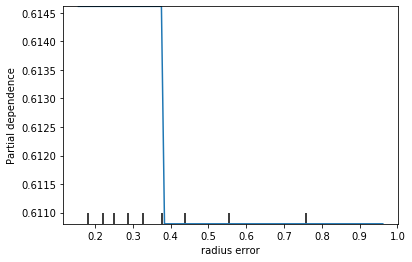

/usr/local/lib/python3.7/site-packages/sklearn/inspection/_plot/partial_dependence.py:582: UserWarning: Attempting to set identical bottom == top == 0.613173676053271 results in singular transformations; automatically expanding.
  axi.set_ylim(self.pdp_lim[1])


<Figure size 2160x2160 with 0 Axes>

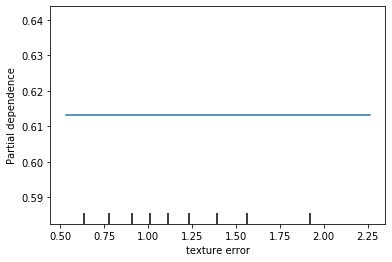

/usr/local/lib/python3.7/site-packages/sklearn/inspection/_plot/partial_dependence.py:582: UserWarning: Attempting to set identical bottom == top == 0.613173676053271 results in singular transformations; automatically expanding.
  axi.set_ylim(self.pdp_lim[1])


<Figure size 2160x2160 with 0 Axes>

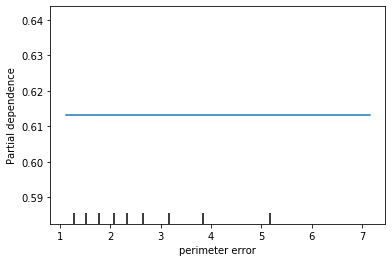

<Figure size 2160x2160 with 0 Axes>

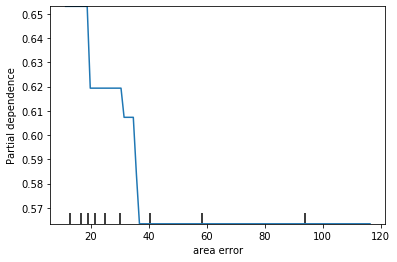

<Figure size 2160x2160 with 0 Axes>

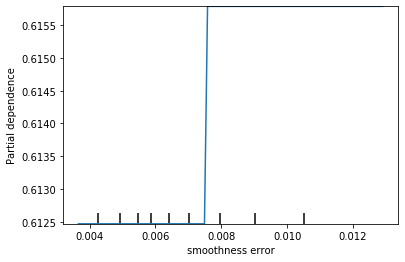

<Figure size 2160x2160 with 0 Axes>

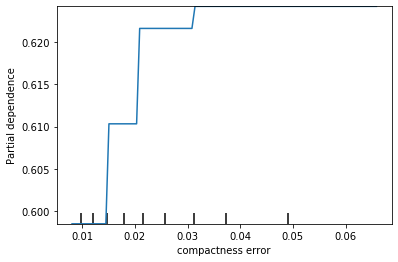

<Figure size 2160x2160 with 0 Axes>

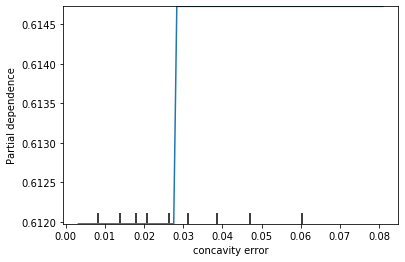

<Figure size 2160x2160 with 0 Axes>

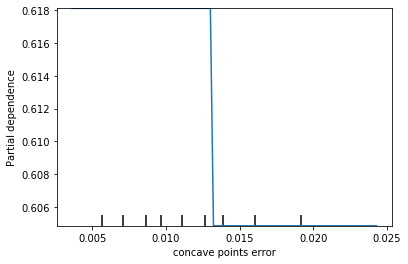

<Figure size 2160x2160 with 0 Axes>

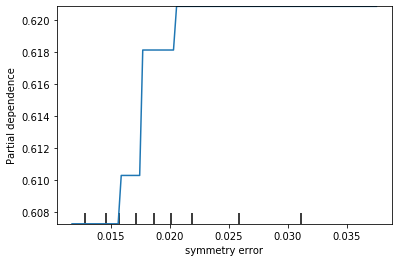

<Figure size 2160x2160 with 0 Axes>

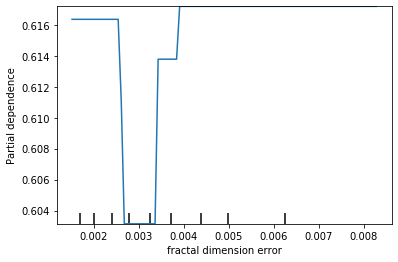

<Figure size 2160x2160 with 0 Axes>

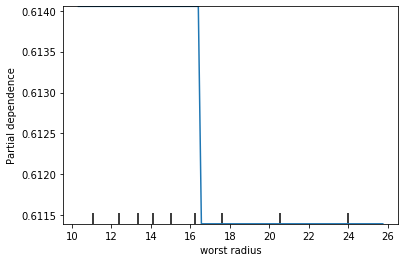

<Figure size 2160x2160 with 0 Axes>

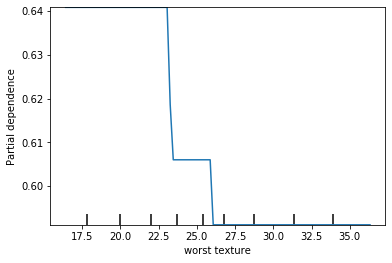

<Figure size 2160x2160 with 0 Axes>

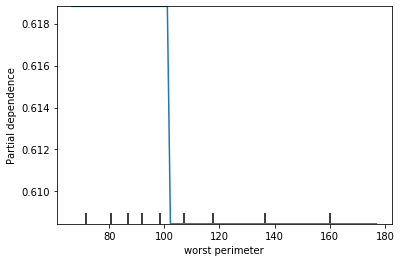

<Figure size 2160x2160 with 0 Axes>

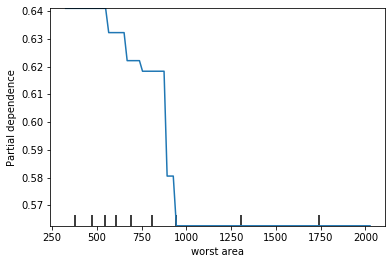

<Figure size 2160x2160 with 0 Axes>

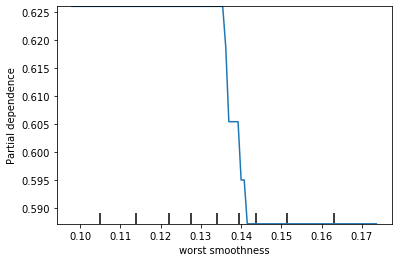

<Figure size 2160x2160 with 0 Axes>

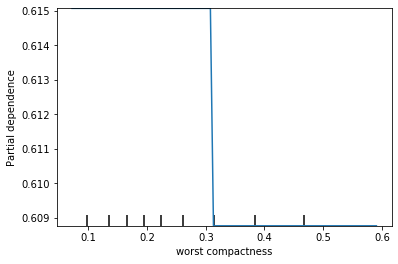

<Figure size 2160x2160 with 0 Axes>

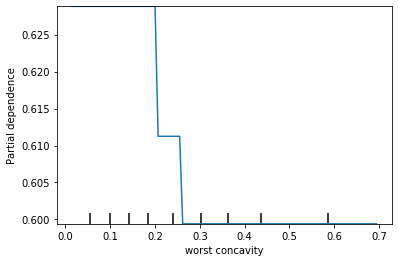

<Figure size 2160x2160 with 0 Axes>

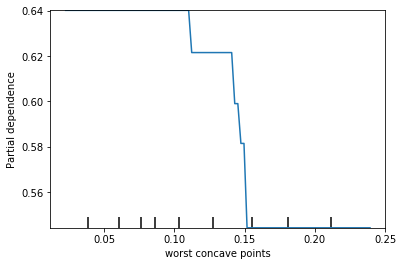

<Figure size 2160x2160 with 0 Axes>

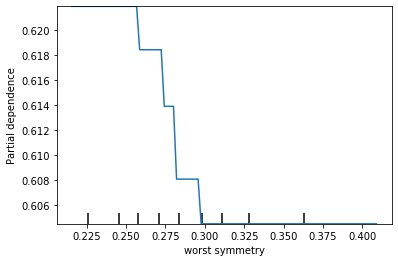

<Figure size 2160x2160 with 0 Axes>

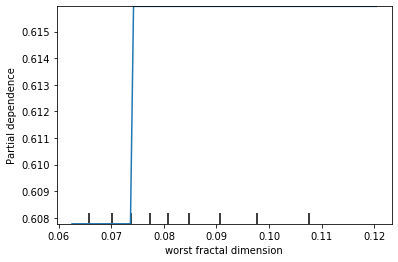

In [63]:
from sklearn.inspection import plot_partial_dependence
X_train = pd.DataFrame(X_train, columns=list(data.feature_names))
for i in data.feature_names:
    plt.figure(figsize=(30,30))
    plot_partial_dependence(gs,X_train,features= [i], grid_resolution=100)  
    plt.show()


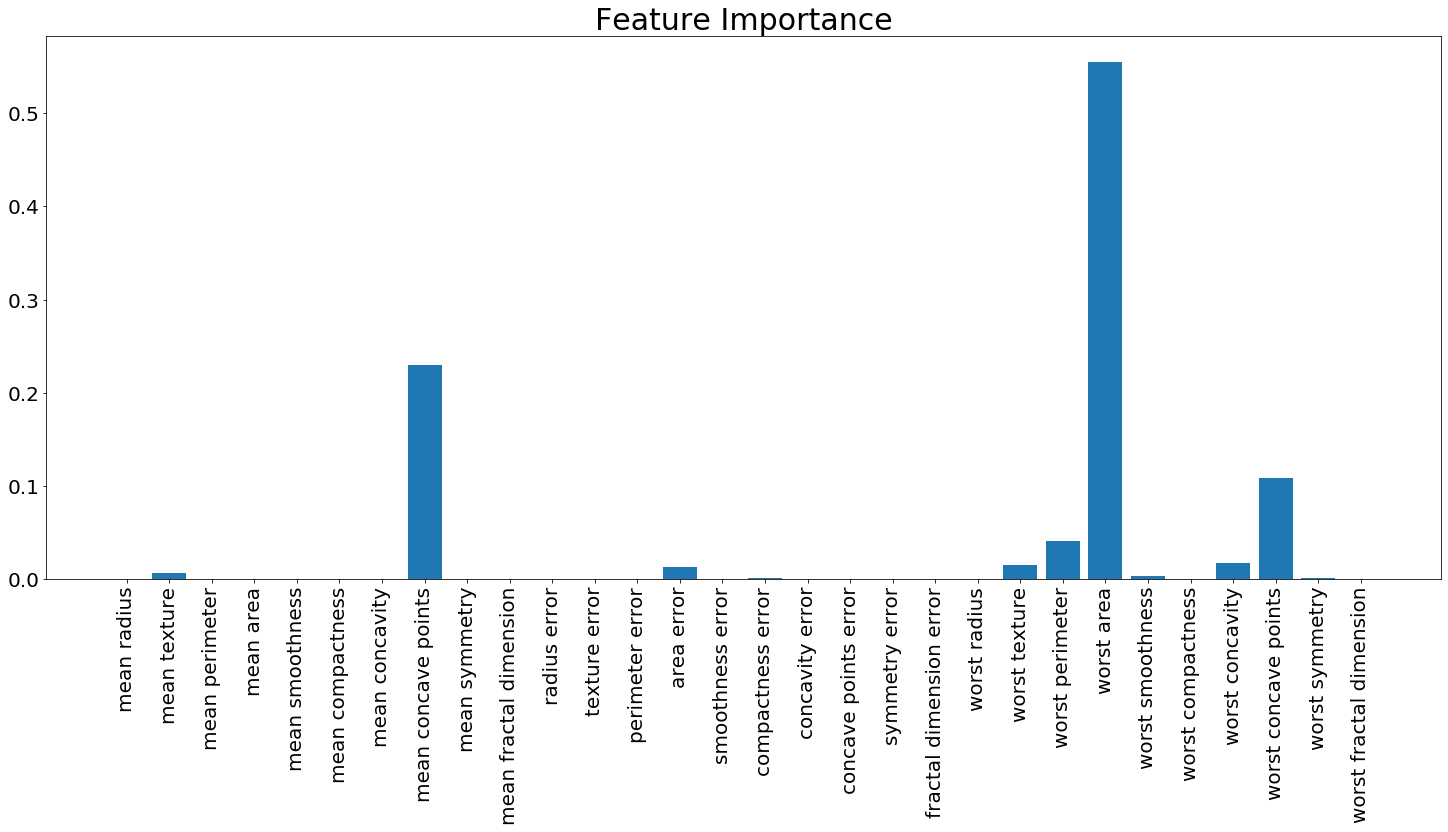

In [85]:
plt.figure(figsize=(25,10))
plt.bar(data.feature_names, gs.best_estimator_.feature_importances_)
plt.xticks(rotation='vertical', size=20)
plt.yticks(size=20)
plt.title('Feature Importance', size=30)

plt.show()

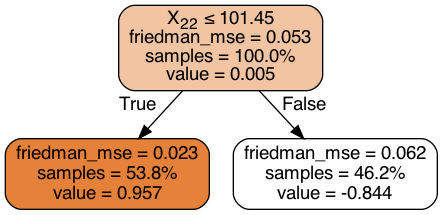

In [110]:
# let's plot tree of best estimator 
import pydot, pydotplus
from IPython.display import Image

dot_data = tree.export_graphviz(
    gs.best_estimator_.estimators_[3,0],
    out_file=None, filled=True,
    rounded=True,  
    special_characters=True,
    proportion=True,
)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())